In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
run = np.load('runs/out.npy')

In [3]:
run.mean()

np.float64(nan)

In [4]:
run.shape

(40, 64, 64, 2)

In [5]:
run = run[20:]

In [6]:

def profile_at_time(snapshot, re, X, dx, dt, K, add_ref_data=True, auto_plot=True, **kwargs):
    re_lb = str(re)
    
    half_x = X // 2 - 1
    uU = snapshot[half_x, :, 0] / K
    yL = np.array(list(range(X))[::-1]) * dx / 1.0
    plt.plot(yL, uU, label=f'Our: re={re_lb}, N={X}, dt={dt}')

    if add_ref_data:
        df = pd.read_csv('../ghia_ref_u.csv', sep='\\s+')
        if re_lb in df.columns:
            plt.scatter(df['y'], df[re_lb], label=f'Ghia & al re={re_lb}')
        else:
            print(f'No reference data at RE={re}') 
            
    plt.ylabel('u/u')
    plt.xlabel('y/L')
    plt.title(f'U profile at x/L = 0.5')
    plt.legend()
    if auto_plot:
        plt.show()

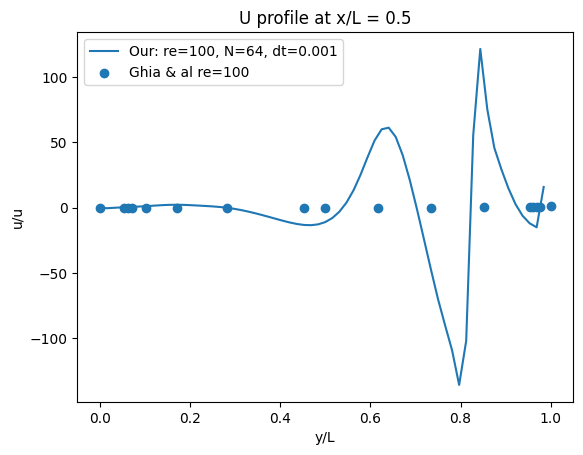

In [7]:
re = 100
X = 64
dx = 1.0 / float(X)
dt = 1e-3
K = 1

profile_at_time(run[5], re, X, dx, dt, K)

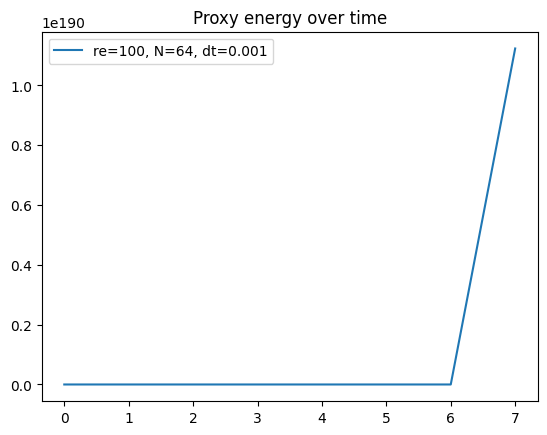

In [8]:
def energy_over_time(u, re, X, dt, auto_plot=True, **kwargs):
        
    # We use a proxy formula for energy defined as sum of squared norm of velocities
    # all_u of shape [S, N, M, 2]
    energy = (u ** 2).sum(axis=(1, 2, 3))
    plt.plot(list(range(len(energy))), energy, label=f're={re}, N={X}, dt={dt}')
    plt.title("Proxy energy over time")
    plt.legend()
    if auto_plot:
        plt.show()

energy_over_time(run, re, X, dt)

In [9]:
import napari
u = np.swapaxes(run, 1, 2)  # invert axe for napari
u = np.pad(u, ((0, 0), (0, 0), (0, 0), (0, 1))) # pad last dim to be 3 so napari thinks its rgb
viewer = napari.imshow(u)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-14.814448823044305..7.758866663356788].


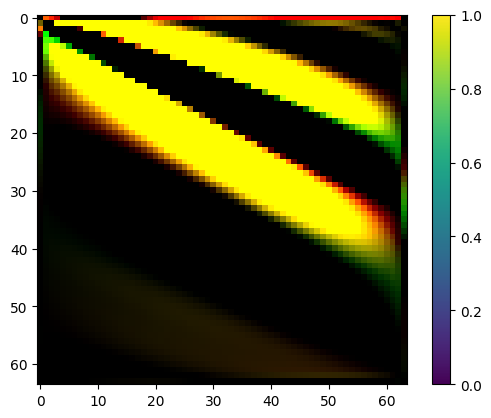

In [10]:
plt.imshow(u[0])
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-14.814448823044305..7.758866663356788].


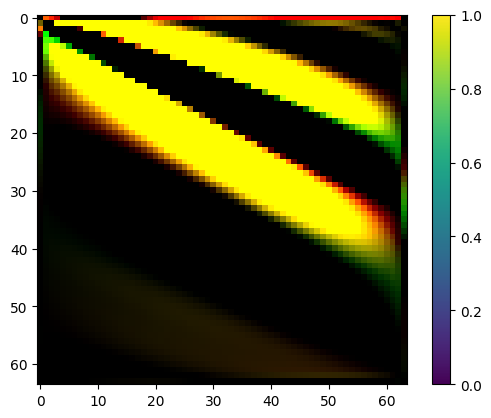

In [18]:
plt.imshow(u[0])
plt.colorbar()